In [16]:
import delay_file
import probability_initial
import error_file
import analytical_file
import ic_file
import numpy as np
import matplotlib.pyplot as plt
import timestep_file
import FLAG_file
import grid_file
import input_file?
import step

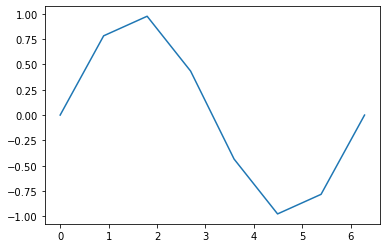

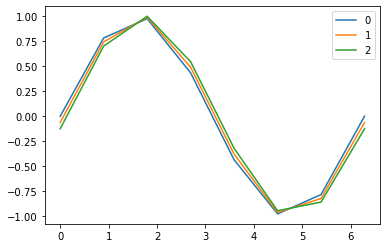

In [18]:
'''Experiments folder create'''
'''Experiment 1 
WORKING CORRECTLY 
Check if input values are picked correctly or not'''
Length=2*np.pi
nx_=input_file.Nx
dx=Length/(nx_-1)
x_=grid_file.grid_(dx,nx_)
C=input_file.c
init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                   num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
dt=timestep_file.timestep_(dx,cfl=input_file.cfl,EqFLAG=FLAG_file.EqnFLAG,cx=input_file.c)
plt.plot(x_,init_c)
plt.show()
arr_2d=[]
# Nt=input_file.N_t_
L=3
u=init_c
arr_2d.append(u)
for k in range(L-1):
    rhs=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag='DSync')
    u=step.euler(u,rhs,dt,nx_)
    arr_2d.append(u)
arr_2d=np.stack(arr_2d)
plt.plot(x_,arr_2d[0],label='0')
plt.plot(x_,arr_2d[1],label='1')
plt.plot(x_,arr_2d[2],label='2')
plt.legend()
plt.show()

In [3]:
'''
Experiment 2 
WORKING CORRECTLY 
Buffer points selection from entire grid'''
'''Int data-type  indexing check for errors'''
num_PEs=input_file.numPE
per_PEs=int((nx_)/(num_PEs))
ps_i,pe_i=probability_initial.prob_2D_from_arr_2D(arr_2d[:L-1],num_PEs,per_PEs,L-1)


In [4]:
'''Experiment 3 
WORKING CORRECTLY 
Check if delay_file is working correctly
using 
import delay_file_exp
delay_file_exp.delay_avg(10000)
'''

'Experiment 3 \nWORKING CORRECTLY \nCheck if delay_file is working correctly\nusing \nimport delay_file_exp\ndelay_file_exp.delay_avg(10000)\n'

In [5]:
'''Experiment 4

Check Euler function for time - stepping 
WORKING CORRECTLY 

import step
deltat=3
rhs=np.arange(5)*10
u1=np.arange(5)
nc=5
print(rhs)
print(u1)
print(step.euler(u1,rhs,deltat,nc))
'''

'Experiment 4\n\nCheck Euler function for time - stepping \nWORKING CORRECTLY \n\nimport step\ndeltat=3\nrhs=np.arange(5)*10\nu1=np.arange(5)\nnc=5\nprint(rhs)\nprint(u1)\nprint(step.euler(u1,rhs,deltat,nc))\n'

In [6]:
'''Experiment 5 
THE ISSUE -- Function cd2u1

Check with integer probability delays 
[1,0,0] -- 0,3,4,7 differs from sync XX
[0,1,0] -- 0,3,4,7 differs from sync as it should 
[0,0,1] -- Delay = 2 gives rhs=rhs with Synchrnous code XX  
'''

'Experiment 5 \nTHE ISSUE -- Function cd2u1\n\nCheck with integer probability delays \n[1,0,0] -- 0,3,4,7 differs from sync XX\n[0,1,0] -- 0,3,4,7 differs from sync as it should \n[0,0,1] -- Delay = 2 gives rhs=rhs with Synchrnous code XX  \n'

In [7]:
L

3

In [8]:
ps=ps_i
pe=pe_i
u=arr_2d[L-1]

In [9]:
rhs,ps,pe=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag=FLAG_file.SyncFLAG,L=3,PE=num_PEs,
                     perPE=per_PEs,pstart_in=ps,pend_in=pe)

In [10]:
rhs

array([-0.82587657, -0.62613938,  0.08683587,  0.79814886,  0.7671374 ,
        0.29929087, -0.4557637 , -0.91276875])

In [11]:
rhs_sync=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag='DSync',L=3,
                    PE=num_PEs,perPE=per_PEs,pstart_in=ps,pend_in=pe)

In [12]:
rhs_sync

array([-0.8676189 , -0.62613938,  0.08683587,  0.73442193,  0.82897331,
        0.29929087, -0.4557637 , -0.8676189 ])

In [13]:
rhs==rhs_sync

array([False,  True,  True, False, False,  True,  True, False])

In [14]:
'''See if delay file picked in Python.py file'''

'See if delay file picked in Python.py file'

[ 0 10 20 30 40]
[0 1 2 3 4]
[  0  31  62  93 124]


In [25]:
3*rhs

array([  0,  30,  60,  90, 120])

In [20]:
u1

array([0, 1, 2, 3, 4])

In [17]:
rhs

array([ 0, 10, 20, 30, 40])

In [17]:
ps_i

array([[ 0.78183148, -0.43388374],
       [ 0.74283437, -0.37753127]])

In [18]:
pe_i

array([[ 0.43388374, -0.78183148],
       [ 0.49023621, -0.8208286 ]])

In [20]:
plt.plot(x_,ls[0])
plt.plot(x_,ls[8])
# plt.plot(x_,ls[])
# plt.plot(x_,ls[1])


NameError: name 'ls' is not defined

In [10]:
x_

array([0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
       4.48798951, 5.38558741, 6.28318531])

In [6]:
dx*input_file.cfl

0.07180783208205242

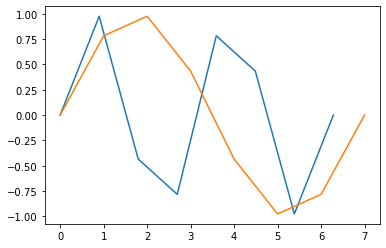

In [11]:
init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                   num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
plt.plot(x_,init_c)
plt.plot(np.sin(x_))


In [ ]:
'''First check if each imported file working correctly'''

In [ ]:
'''Check if pend and pstart are picking correct values'''
'''Check if progression in time is going right 
for Nx=8
PE=2
Check for this simple case 
'''

In [2]:
x=0
for i in range(10000):
    x+=delay_file.delay_()
print(x/10000)

1.6927


In [1]:
def Async_sim(num_grid):    
    import probability_initial
    import error_file
    import analytical_file
    import ic_file
    import numpy as np
    import matplotlib.pyplot as plt
    import timestep_file
    import FLAG_file
    import grid_file
    import input_file
    import step
    import delay_file
    ## This cell remains same for Asynchronous compute ##
    Length=2*np.pi
    nx_=num_grid
    dx=Length/(nx_-1)
    x_=grid_file.grid_(dx,nx_)
    C=input_file.c
    dt=timestep_file.timestep_(dx,cfl=input_file.cfl,EqFLAG=FLAG_file.EqnFLAG,cx=input_file.c)

    init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                       num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
    plt.plot(x_,init_c)
#     plt.show()

    '''First L-1 time-steps'''
    arr_2d=[]
    # Nt=input_file.N_t_
    L=3
    u=init_c
    arr_2d.append(u)
    for k in range(L-1):
        rhs=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag='DSync')
        u=step.euler(u,rhs,dt,nx_)
        arr_2d.append(u)
    arr_2d=np.stack(arr_2d)

    '''Buffer points selection from entire grid'''
    '''Int data-type  indexing check for errors'''
    num_PEs=input_file.numPE
    per_PEs=int((nx_)/(num_PEs))
    ps_i,pe_i=probability_initial.prob_2D_from_arr_2D(arr_2d[1:],num_PEs,per_PEs,L-1)

    ls=[]
    Nt=input_file.N_t_
    u=arr_2d[L-1]
    ls.append(u)
    ps=ps_i
    pe=pe_i
    for j in range(Nt):
        rhs,ps,pe=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag=FLAG_file.SyncFLAG,L=3,PE=num_PEs,perPE=per_PEs,
                             pstart_in=ps,pend_in=pe)
        u=step.euler(u,rhs,dt,nx_)
        ls.append(u)

    Nt_total=Nt+L
#     for i in range(40):
#         plt.plot(x_,ls[i*7])
    ana_soln=analytical_file.analytical_(x_,input_file.amp_ls,input_file.k_ls,input_file.phi_ls,input_file.numk,
                                    input_file.numphi,nx_,dt*Nt,C,0)
    error_Nx=error_file.error_MSE_(ana_soln,ls[-1])
    return error_Nx

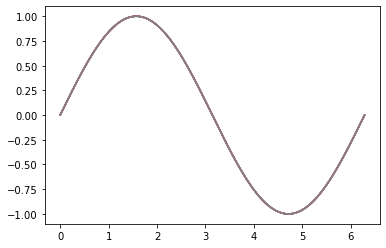

In [2]:
import matplotlib.pyplot as plt
import numpy as np
err=[]
n_list=64*np.arange(7,15)
for n in n_list:
    err.append(Async_sim(n))
# plt.plot(n_list,err)

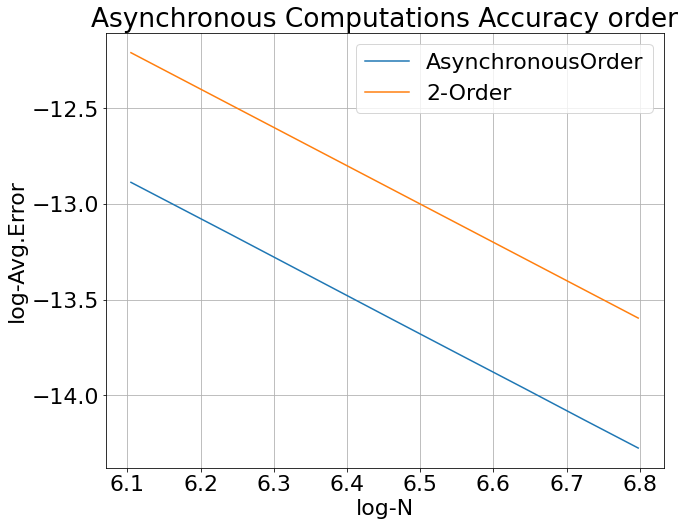

In [3]:
import numpy as np
def plot_error(n_list,err,comptype='Synchronous',order=2):
    # plt.plot(n_list,err)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(10,8))
    plt.plot(np.log(n_list),np.log(err),label=f'{comptype}Order')
    plt.plot(np.log(n_list),-2*np.log(n_list),label=f'{order}-Order')
    plt.title(f"{comptype} Computations Accuracy order")
    plt.xlabel("log-N")
    plt.ylabel("log-Avg.Error")
    plt.legend()
    plt.grid()
plot_error(n_list,err,'Asynchronous',2)

In [ ]:
plt.plot(np.log(n_list),np.log(err))
plt.plot(np.log(n_list),-1*np.log(n_list))

In [1]:
import delay_file

In [2]:
x=0
for i in range(10000):
    x+=delay_file.delay_()

In [3]:
x/10000

1.984